In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

sns.set_palette('cubehelix')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
with open('pickles/may18_turnstiles.pickle', 'rb') as pik:
    data = pickle.load(pik)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.columns = [column.strip() for column in df.columns]
df['DATETIME'] = pd.to_datetime(df.DATE +" " + df.TIME, format='%m/%d/%Y %H:%M:%S')
df['WEEKDAY_NUM'] = [dt.weekday() for dt in df['DATETIME']]

weekdays = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
df['WEEKDAY'] = [weekdays[day] for day in df['WEEKDAY_NUM']]

with open('pickles/with_weekdays.pickle', 'wb') as writer:
    pickle.dump(df, writer)

In [11]:
with open('/Users/Stephen/Desktop/may_2018_with_counts.pickle', 'rb') as pik:
    data = pickle.load(pik)
    
df = pd.DataFrame(data)

In [11]:
df.drop(['ENTRIES','EXITS'],axis = 1, inplace=True)

,C/A,UNIT,SCP,STATION,DIVISION,DATE,DESC,DATETIME,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 00:00:00,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 04:00:00,Saturday,17.0,1.0,18.0
2,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 08:00:00,Saturday,16.0,33.0,49.0
3,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 12:00:00,Saturday,81.0,92.0,173.0
4,A002,R051,02-00-00,59 ST,BMT,04/28/2018,REGULAR,2018-04-28 16:00:00,Saturday,214.0,60.0,274.0


In [13]:
df['WEEKDAY_NUM'] = [day.weekday() for day in df['DATETIME']]
df.sort_values('WEEKDAY_NUM', inplace=True)
weekdays = df.groupby(['WEEKDAY_NUM','WEEKDAY']).sum()
weekdays.reset_index(inplace = True)

,WEEKDAY_NUM,WEEKDAY,ENTRIES,EXITS,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
0,0,Monday,4418737954079,3629337896632,23123375.0,17319486.0,40442861.0
1,1,Tuesday,4447870587696,3648260882732,24618224.0,18504119.0,43122343.0
2,2,Wednesday,4466926770833,3660480418118,24894589.0,18747748.0,43642337.0
3,3,Thursday,4434251485261,3637736383724,24892911.0,18727650.0,43620561.0
4,4,Friday,4468719659878,3662632167402,24038302.0,18252680.0,42290982.0
5,5,Saturday,4405728168432,3627861112494,13182721.0,10660855.0,23843576.0
6,6,Sunday,4395412300274,3618964370009,10741112.0,8738102.0,19479214.0


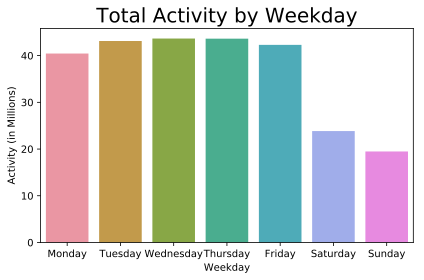

In [24]:
sns.barplot(x = 'WEEKDAY', y = 'TOTAL_ACTIVITY', data = weekdays)

plt.title('Total Activity by Weekday', {'fontsize': 20})
plt.xlabel('Weekday')
plt.ylabel('Activity (in Millions)')
plt.yticks(list(range(0,50000000,10000000)),['0','10','20','30','40'])
plt.tight_layout()
plt.savefig('presentation/figures/activity_by_weekday.svg')

In [14]:
df.sort_values(['STATION','WEEKDAY_NUM'], inplace=True)
stations_by_weekday = df.groupby(['STATION','WEEKDAY_NUM','WEEKDAY']).sum()
stations_by_weekday.reset_index(inplace = True)

stations_by_weekday.sort_values(['STATION','TOTAL_ACTIVITY'], ascending=False, inplace=True)
stations_by_weekday = stations_by_weekday.groupby('STATION').first()
stations_by_weekday.sort_values('TOTAL_ACTIVITY', ascending=False, inplace = True)

,WEEKDAY_NUM,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
STATION,,,,,
34 ST-PENN STA,3,Thursday,708436.0,592952.0,1301388.0
GRD CNTRL-42 ST,2,Wednesday,654426.0,595243.0,1249669.0
34 ST-HERALD SQ,3,Thursday,531444.0,459411.0,990855.0
23 ST,2,Wednesday,529006.0,378054.0,907060.0
TIMES SQ-42 ST,3,Thursday,435048.0,394918.0,829966.0
14 ST-UNION SQ,2,Wednesday,446567.0,379658.0,826225.0
FULTON ST,3,Thursday,424879.0,349010.0,773889.0
42 ST-PORT AUTH,4,Friday,406652.0,313283.0,719935.0
86 ST,2,Wednesday,369763.0,300603.0,670366.0


In [15]:
stations_by_weekday_busiest = stations_by_weekday.head(100)
stations_by_weekday_busiest = stations_by_weekday_busiest.groupby(['WEEKDAY_NUM','WEEKDAY']).count()
stations_by_weekday_busiest.reset_index(inplace = True)

stations_by_weekday_busiest.sort_values(['WEEKDAY_NUM'], inplace=True)
stations_by_weekday_busiest.set_index(['WEEKDAY_NUM'],inplace=True)

,WEEKDAY,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
WEEKDAY_NUM,,,,
0,Monday,1,1,1
1,Tuesday,13,13,13
2,Wednesday,37,37,37
3,Thursday,28,28,28
4,Friday,21,21,21


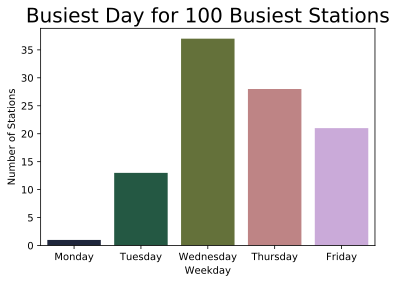

In [209]:
sns.barplot(x = 'WEEKDAY', y = 'TOTAL_ACTIVITY', data=stations_by_weekday_busiest)

plt.xlabel('Weekday')
plt.ylabel('Number of Stations')
plt.title('Busiest Day for 100 Busiest Stations', fontdict={'fontsize': 20})

plt.savefig('presentation/figures/busiest_days.svg')

In [142]:
df.sort_values(['STATION','WEEKDAY_NUM'], inplace=True)
busiest_station_days = df.groupby(['STATION','WEEKDAY_NUM','WEEKDAY']).sum()
busiest_station_days.sort_values(['TOTAL_ACTIVITY'], ascending=False, inplace=True)
busiest_station_days = busiest_station_days.head(100)
busiest_station_days = busiest_station_days.groupby(['STATION']).count()
busiest_station_days.sort_values

,ENTRY_COUNTS,EXIT_COUNTS,TOTAL_ACTIVITY
STATION,,,
125 ST,5,5,5
14 ST,4,4,4
14 ST-UNION SQ,7,7,7
23 ST,5,5,5
34 ST-HERALD SQ,7,7,7
34 ST-PENN STA,7,7,7
42 ST-PORT AUTH,7,7,7
47-50 STS ROCK,5,5,5
59 ST,5,5,5


In [134]:
busiest_stations = df.groupby('STATION').sum().sort_values('TOTAL_ACTIVITY', ascending=False).head(10)

In [45]:
unique_stations = stations_by_weekday['STATION'].unique()
values = ['Monday' for x in unique_stations]
greatest_by_station = dict(zip(unique_stations, values))

print(len(greatest_by_station))

375


In [ ]:
df['TIME'] = [day.time() for day in df['DATETIME']]
df['HOUR'] = [time.hour for time in df['TIME']]
df.sort_values(['STATION','WEEKDAY'])

In [ ]:
by_hour = df.groupby('HOUR').mean()
by_hour.reset_index(inplace=True)
by_hour

In [ ]:
four_hour = []
for i in range(0,6):
    for _ in range(0,4):
        four_hour.append(i*4)

In [ ]:
four_hour = np.array(four_hour)
by_hour['FOUR_HOUR'] = four_hour

In [ ]:
by_four_hour = by_hour.groupby('FOUR_HOUR').mean()
by_four_hour.reset_index(inplace=True)
plt.plot(by_four_hour['FOUR_HOUR'], by_four_hour['TOTAL_ACTIVITY'])